Processing 5 combinations | Sampling itemset size 5


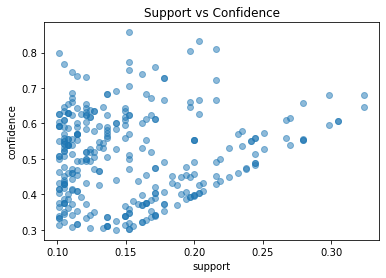

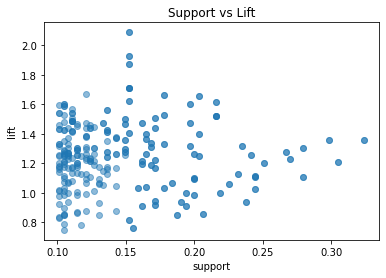

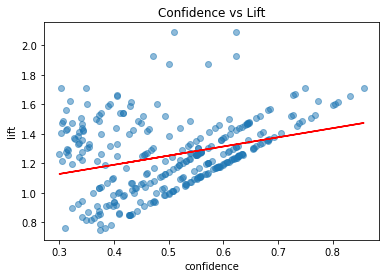

y= 0.621 x + 0.941


In [27]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

df = pd.read_csv('retail_dataset.csv') 

## generate a list of unique items in the market basket
items = (df['0'].unique())

## creates a table with item names as column names and transaction numbers as row names 
## with 1s and 0s indicating item was purchased in transactions
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

freq_items = apriori(ohe_df, min_support=0.1, use_colnames=True, verbose=1)

rules = association_rules(freq_items, metric='confidence', min_threshold=0.3)

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

x   = rules['confidence']
y   = rules['lift']
m,b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha = 0.5) 
plt.plot(x,b+m*x, color='red')
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

m=round(m,3)
b=round(b,3)
print('y=',m,"x +",b)

In [28]:
m=round(m,3)
b=round(b,3)
print('y=',m,"x +",b)

y= 0.621 x + 0.941


In [29]:
X=0.65
m*X+b

1.34465

In [30]:
most_freq = freq_items.sort_values(by=['support'],ascending=False)
most_freq

,support,itemsets
3,0.504762,(Bread)
7,0.501587,(Cheese)
1,0.501587,(Milk)
2,0.476190,(Meat)
5,0.438095,(Wine)
...,...,...
67,0.101587,"(Cheese, Milk, Pencil)"
91,0.101587,"(Cheese, Diaper, Eggs)"
96,0.101587,"(Wine, Cheese, Milk, Meat)"
51,0.101587,"(Bagel, Bread, Wine)"


In [31]:
rules.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
282,"(Eggs, Meat, Milk)",(Cheese),0.177778,0.501587,0.152381,0.857143,1.708861,0.063210,3.488889
116,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
204,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
157,"(Eggs, Milk)",(Cheese),0.244444,0.501587,0.196825,0.805195,1.605293,0.074215,2.558519
271,"(Milk, Wine, Meat)",(Cheese),0.126984,0.501587,0.101587,0.800000,1.594937,0.037894,2.492063
...,...,...,...,...,...,...,...,...,...
179,(Diaper),"(Wine, Meat)",0.406349,0.250794,0.123810,0.304688,1.214893,0.021900,1.077510
167,(Wine),"(Bread, Meat)",0.438095,0.206349,0.133333,0.304348,1.474916,0.042933,1.140873
292,(Milk),"(Cheese, Eggs, Meat)",0.501587,0.215873,0.152381,0.303797,1.407297,0.044102,1.126291
289,(Cheese),"(Eggs, Meat, Milk)",0.501587,0.177778,0.152381,0.303797,1.708861,0.063210,1.181010
